In [5]:
pip install pandas openpyxl


In [6]:
import pandas as pd

# Load the Excel file (replace filename if needed)
df = pd.read_excel("Online Retail.xlsx", engine='openpyxl')


In [7]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [8]:
#data cleaning
import pandas as pd

# Display basic info
print("Initial info:")
df.info()

# --- 1. Handle Missing Values ---

# Check for missing values
print("\nMissing values per column:")
print(df.isnull().sum())

# Drop rows with missing critical values
df.dropna(subset=['CustomerID', 'Description', 'InvoiceDate'], inplace=True)

# --- 2. Remove Duplicates ---

df.drop_duplicates(inplace=True)

# --- 4. Check for and Handle Outliers ---

# Remove entries with negative or zero Quantity or UnitPrice
df = df[(df['Quantity'] > 0) & (df['UnitPrice'] > 0)]

# --- 5. Ensure Correct Data Types ---

df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# --- 6. Add a TotalPrice Column ---
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# --- 7. Final Check ---
print("\nCleaned DataFrame Info:")
df.info()
print("\nPreview of Cleaned Data:")
df.head()


Initial info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB

Missing values per column:
InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

Cleaned DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
Index: 392692 

<ipython-input-8-f40f321e9ee5>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])
<ipython-input-8-f40f321e9ee5>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['TotalPrice'] = df['Quantity'] * df['UnitPrice']


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [9]:
#Data Transformation
# 1. Create TotalPrice (if not already done)
df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# 2. Convert InvoiceDate to datetime (safety check)
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

# 3. Extract date parts
df['DayOfWeek'] = df['InvoiceDate'].dt.day_name()
df['Month'] = df['InvoiceDate'].dt.month_name()
df['Year'] = df['InvoiceDate'].dt.year

# Optional: Extract hour if time of day is relevant
df['Hour'] = df['InvoiceDate'].dt.hour

# Preview transformed data
df[['InvoiceDate', 'DayOfWeek', 'Month', 'Year', 'Hour']].head()


,InvoiceDate,DayOfWeek,Month,Year,Hour
0,2010-12-01 08:26:00,Wednesday,December,2010,8
1,2010-12-01 08:26:00,Wednesday,December,2010,8
2,2010-12-01 08:26:00,Wednesday,December,2010,8
3,2010-12-01 08:26:00,Wednesday,December,2010,8
4,2010-12-01 08:26:00,Wednesday,December,2010,8


In [10]:
# Basic statistics for Quantity and TotalPrice
print("Basic statistics for Quantity and TotalPrice:\n")
print(df[['Quantity', 'TotalPrice']].describe())


Basic statistics for Quantity and TotalPrice:

            Quantity     TotalPrice
count  392692.000000  392692.000000
mean       13.119702      22.631500
std       180.492832     311.099224
min         1.000000       0.001000
25%         2.000000       4.950000
50%         6.000000      12.450000
75%        12.000000      19.800000
max     80995.000000  168469.600000


EDA

In [11]:
# To find mean,median and the standard deviation
print("\nMeans:")
print(df[['Quantity', 'TotalPrice']].mean())

print("\nMedians:")
print(df[['Quantity', 'TotalPrice']].median())

print("\nStandard Deviations:")
print(df[['Quantity', 'TotalPrice']].std())



Means:
Quantity      13.119702
TotalPrice    22.631500
dtype: float64

Medians:
Quantity       6.00
TotalPrice    12.45
dtype: float64

Standard Deviations:
Quantity      180.492832
TotalPrice    311.099224
dtype: float64


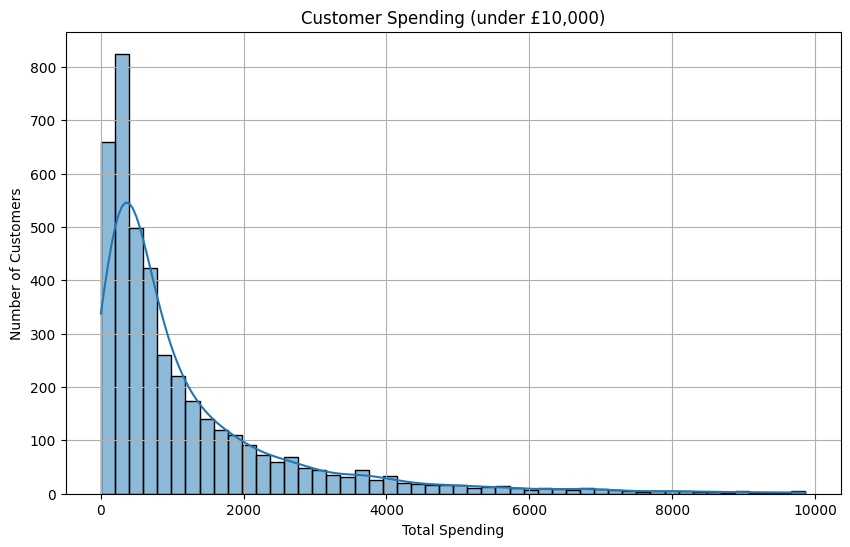

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Total spending per customer
customer_spending = df.groupby('CustomerID')['TotalPrice'].sum()

plt.figure(figsize=(10,6))
sns.histplot(customer_spending[customer_spending < 10000], bins=50, kde=True)
plt.title("Customer Spending (under £10,000)")
plt.xlabel("Total Spending")
plt.ylabel("Number of Customers")
plt.grid(True)
plt.show()

<ipython-input-16-ef8ff5b385e7>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')


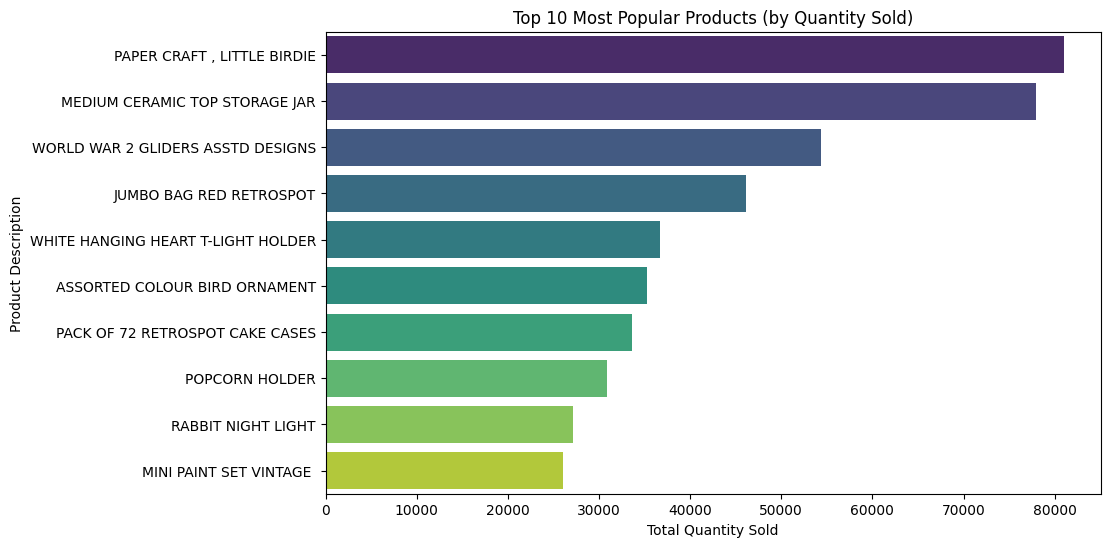

In [16]:
#bar chart
top_products = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(10,6))
sns.barplot(x=top_products.values, y=top_products.index, palette='viridis')
plt.title("Top 10 Most Popular Products (by Quantity Sold)")
plt.xlabel("Total Quantity Sold")
plt.ylabel("Product Description")
plt.show()

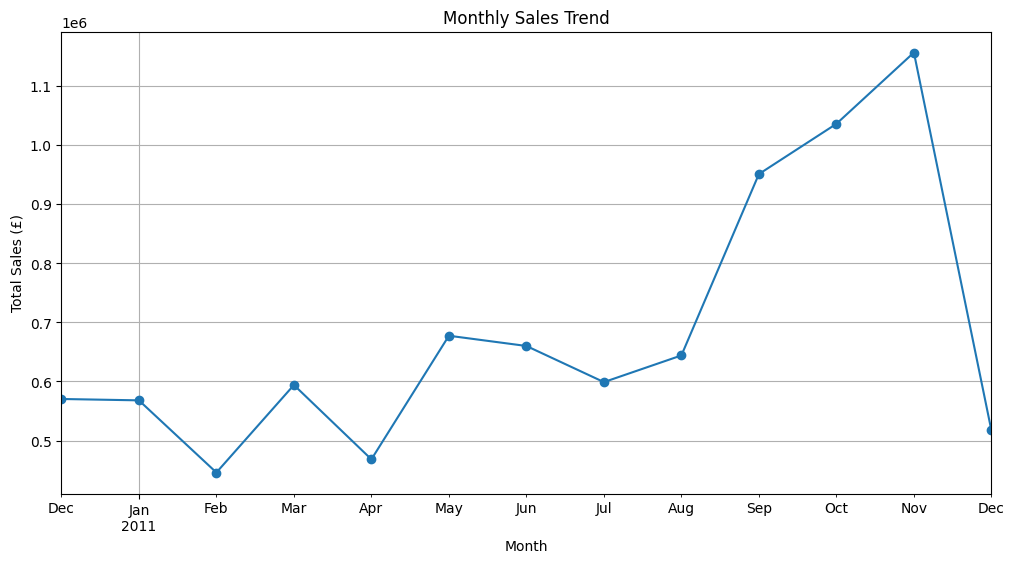

In [17]:
#line plot
# Create a Month-Year column
df['MonthYear'] = df['InvoiceDate'].dt.to_period('M')

monthly_sales = df.groupby('MonthYear')['TotalPrice'].sum()

# Convert index to datetime for plotting
monthly_sales.index = monthly_sales.index.to_timestamp()

plt.figure(figsize=(12,6))
monthly_sales.plot(marker='o')
plt.title("Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Total Sales (£)")
plt.grid(True)
plt.show()

 Customer Segmentation

In [18]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Aggregate data by CustomerID
customer_df = df.groupby('CustomerID').agg({
    'InvoiceNo': 'nunique',        # Purchase frequency
    'TotalPrice': 'sum'            # Total amount spent
}).reset_index()

customer_df.rename(columns={'InvoiceNo': 'NumPurchases', 'TotalPrice': 'TotalSpent'}, inplace=True)


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_df[['NumPurchases', 'TotalSpent']])


In [20]:
kmeans = KMeans(n_clusters=3, random_state=42)
customer_df['Cluster'] = kmeans.fit_predict(scaled_data)


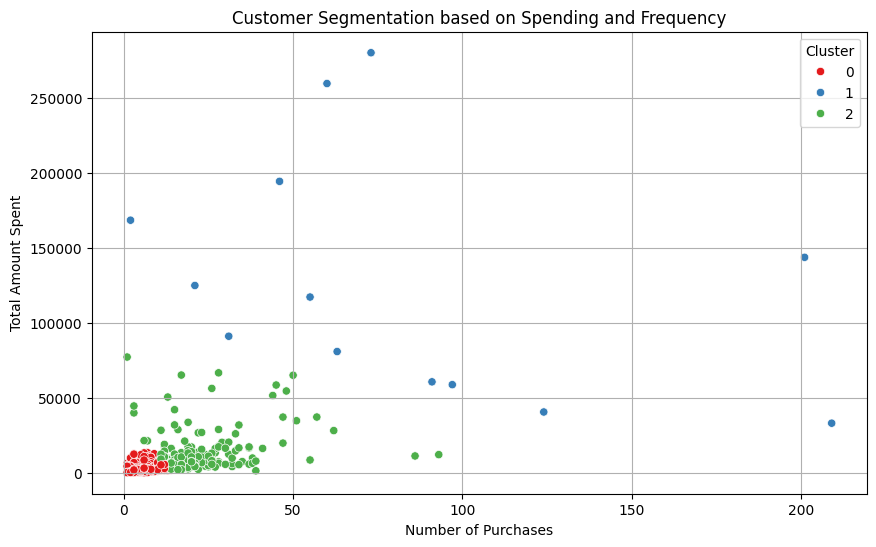

In [21]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    data=customer_df,
    x='NumPurchases',
    y='TotalSpent',
    hue='Cluster',
    palette='Set1'
)
plt.title('Customer Segmentation based on Spending and Frequency')
plt.xlabel('Number of Purchases')
plt.ylabel('Total Amount Spent')
plt.grid(True)
plt.show()


In [23]:
# Sort customers by total spent
top_customers = customer_df.sort_values(by='TotalSpent', ascending=False).head(10)
print("Top 10 Most Valuable Customers:")
print(top_customers)


Top 10 Most Valuable Customers:
      CustomerID  NumPurchases  TotalSpent  Cluster
1689     14646.0            73   280206.02        1
4201     18102.0            60   259657.30        1
3728     17450.0            46   194390.79        1
3008     16446.0             2   168472.50        1
1879     14911.0           201   143711.17        1
55       12415.0            21   124914.53        1
1333     14156.0            55   117210.08        1
3771     17511.0            31    91062.38        1
2702     16029.0            63    80850.84        1
0        12346.0             1    77183.60        2


Customer Insights

In [24]:
# Top products by quantity sold (popularity)
top_products_quantity = df.groupby('Description')['Quantity'].sum().sort_values(ascending=False).head(10)
print("Top 10 Most Popular Products (by Quantity):")
print(top_products_quantity)

# Top products by total revenue
top_products_revenue = df.groupby('Description')['TotalPrice'].sum().sort_values(ascending=False).head(10)
print("\nTop 10 Revenue-Generating Products:")
print(top_products_revenue)


Top 10 Most Popular Products (by Quantity):
Description
PAPER CRAFT , LITTLE BIRDIE           80995
MEDIUM CERAMIC TOP STORAGE JAR        77916
WORLD WAR 2 GLIDERS ASSTD DESIGNS     54319
JUMBO BAG RED RETROSPOT               46078
WHITE HANGING HEART T-LIGHT HOLDER    36706
ASSORTED COLOUR BIRD ORNAMENT         35263
PACK OF 72 RETROSPOT CAKE CASES       33670
POPCORN HOLDER                        30919
RABBIT NIGHT LIGHT                    27153
MINI PAINT SET VINTAGE                26076
Name: Quantity, dtype: int64

Top 10 Revenue-Generating Products:
Description
PAPER CRAFT , LITTLE BIRDIE           168469.60
REGENCY CAKESTAND 3 TIER              142264.75
WHITE HANGING HEART T-LIGHT HOLDER    100392.10
JUMBO BAG RED RETROSPOT                85040.54
MEDIUM CERAMIC TOP STORAGE JAR         81416.73
POSTAGE                                77803.96
PARTY BUNTING                          68785.23
ASSORTED COLOUR BIRD ORNAMENT          56413.03
Manual                                 534

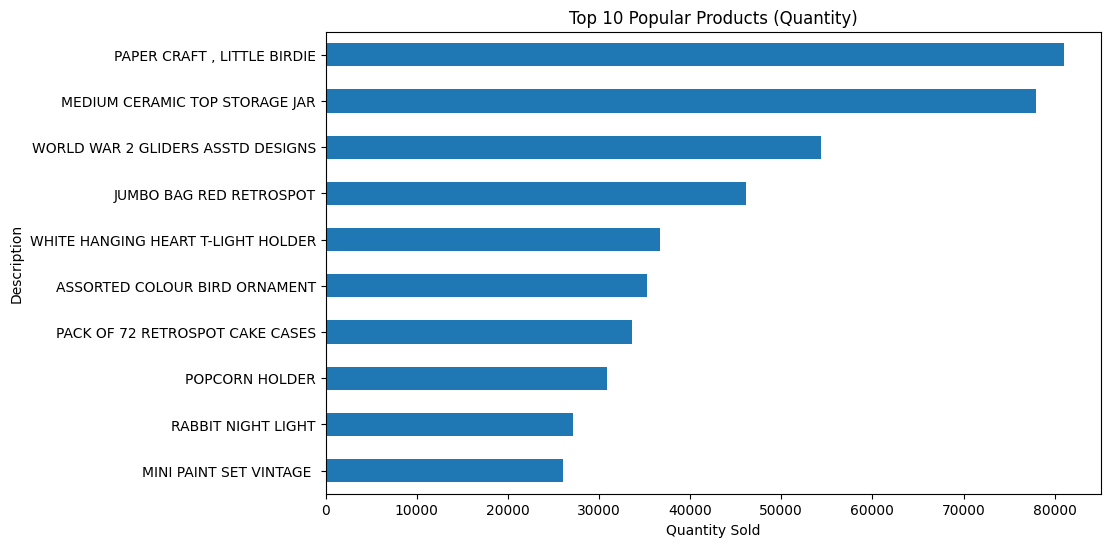

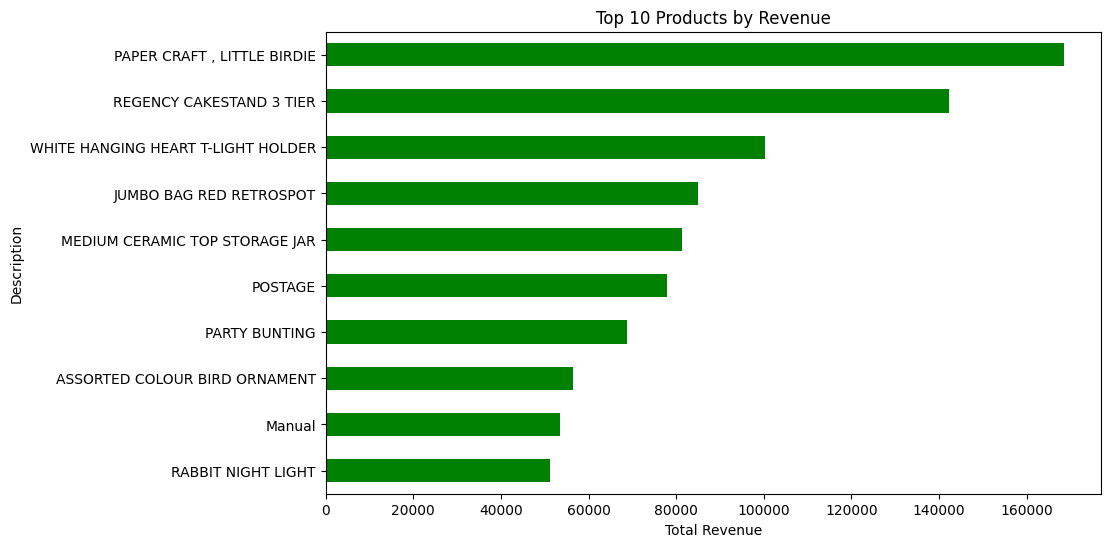

In [25]:
# Plot top 10 popular products
top_products_quantity.plot(kind='barh', figsize=(10,6), title='Top 10 Popular Products (Quantity)')
plt.gca().invert_yaxis()
plt.xlabel('Quantity Sold')
plt.show()

# Plot top 10 revenue products
top_products_revenue.plot(kind='barh', color='green', figsize=(10,6), title='Top 10 Products by Revenue')
plt.gca().invert_yaxis()
plt.xlabel('Total Revenue')
plt.show()


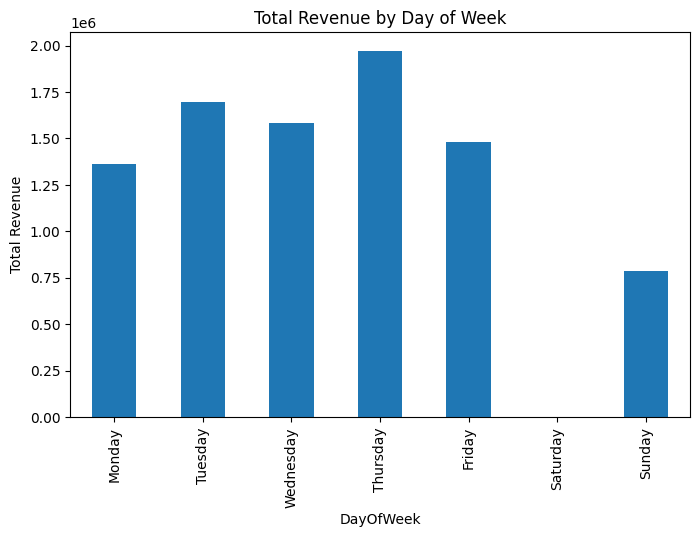

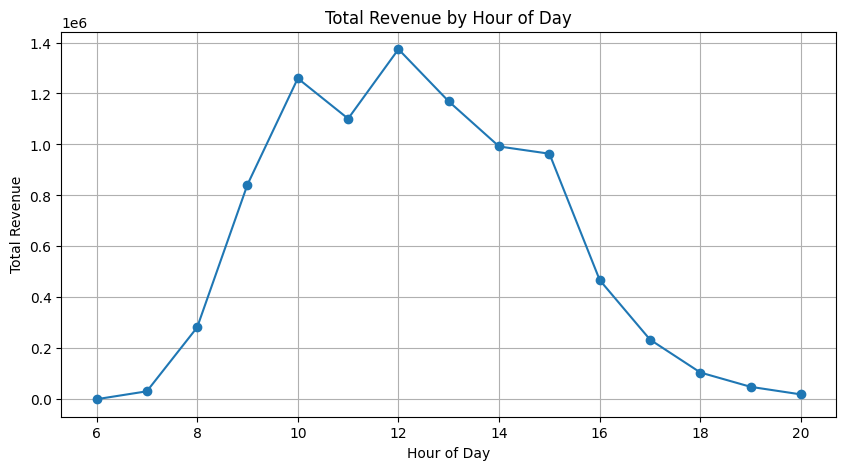

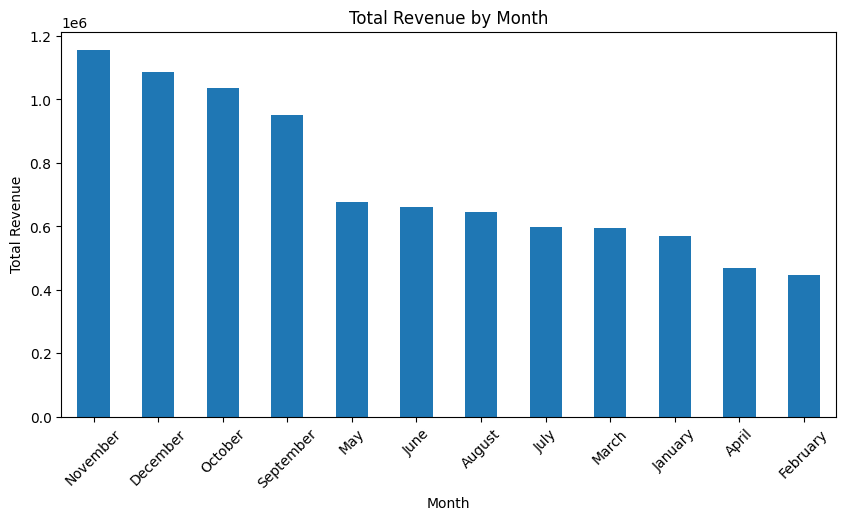

In [26]:
#Buying Patterns Based on Time (Holiday/Weekend/Hour)
# Sales by day of week
df.groupby('DayOfWeek')['TotalPrice'].sum().reindex(
    ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
).plot(kind='bar', title='Total Revenue by Day of Week', figsize=(8,5))
plt.ylabel('Total Revenue')
plt.show()

# Sales by hour
df.groupby('Hour')['TotalPrice'].sum().plot(kind='line', marker='o', title='Total Revenue by Hour of Day', figsize=(10,5))
plt.xlabel('Hour of Day')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()

# Sales by month
df.groupby('Month')['TotalPrice'].sum().sort_values(ascending=False).plot(kind='bar', title='Total Revenue by Month', figsize=(10,5))
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()



Average Number of Purchases per Cluster:
Cluster
0     3.058421
1    82.538462
2    21.141026
Name: NumPurchases, dtype: float64


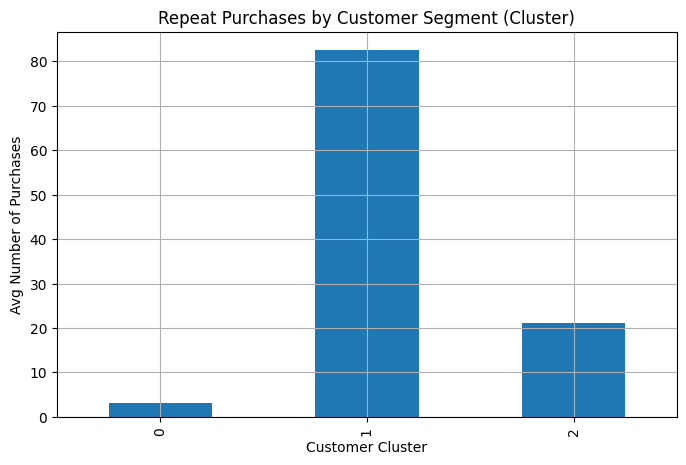

In [27]:
#Purchase Behavior by Customer Segments
# Merge cluster info back to main df
df_with_clusters = df.merge(customer_df[['CustomerID', 'Cluster']], on='CustomerID')

# Calculate repeat purchase count per customer
repeat_df = df.groupby('CustomerID')['InvoiceNo'].nunique().reset_index(name='NumPurchases')

# Add cluster info
repeat_df = repeat_df.merge(customer_df[['CustomerID', 'Cluster']], on='CustomerID')

# Average purchases per cluster
avg_repeat_by_cluster = repeat_df.groupby('Cluster')['NumPurchases'].mean()
print("Average Number of Purchases per Cluster:")
print(avg_repeat_by_cluster)

# Plot
avg_repeat_by_cluster.plot(kind='bar', title='Repeat Purchases by Customer Segment (Cluster)', figsize=(8,5))
plt.xlabel('Customer Cluster')
plt.ylabel('Avg Number of Purchases')
plt.grid(True)
plt.show()


Visualization

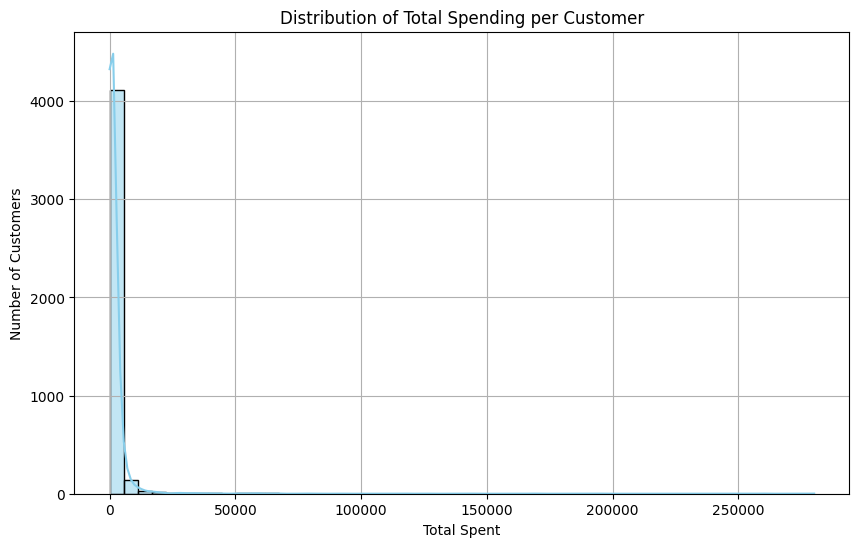

In [28]:
#Histogram: Spending Distribution per Customer
plt.figure(figsize=(10,6))
sns.histplot(customer_df['TotalSpent'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Total Spending per Customer')
plt.xlabel('Total Spent')
plt.ylabel('Number of Customers')
plt.grid(True)
plt.show()


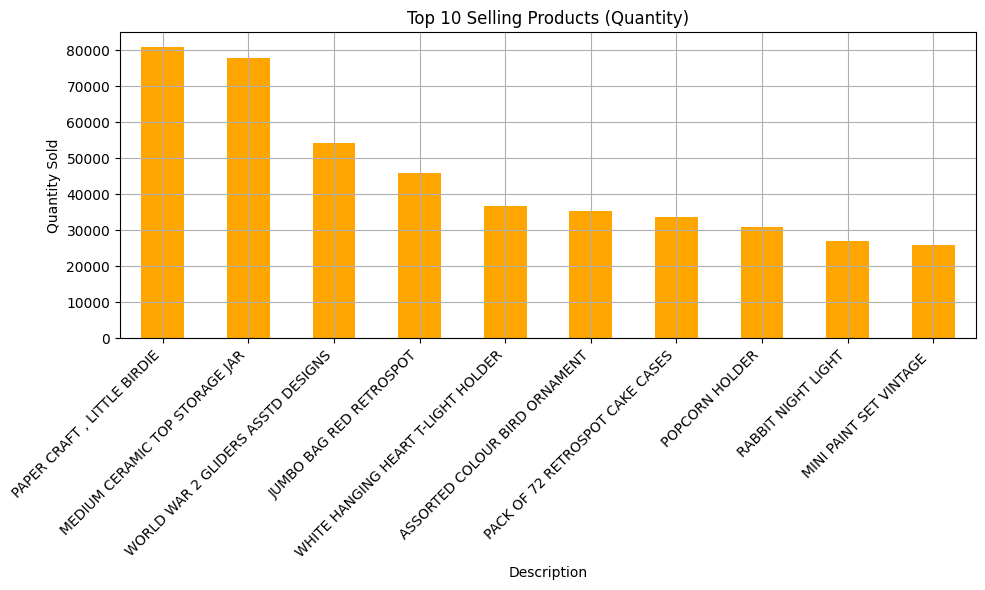

In [30]:
#Bar Chart: Top-Selling Products by Quantity
top_products_quantity.plot(kind='bar', figsize=(10,6), title='Top 10 Selling Products (Quantity)', color='orange')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


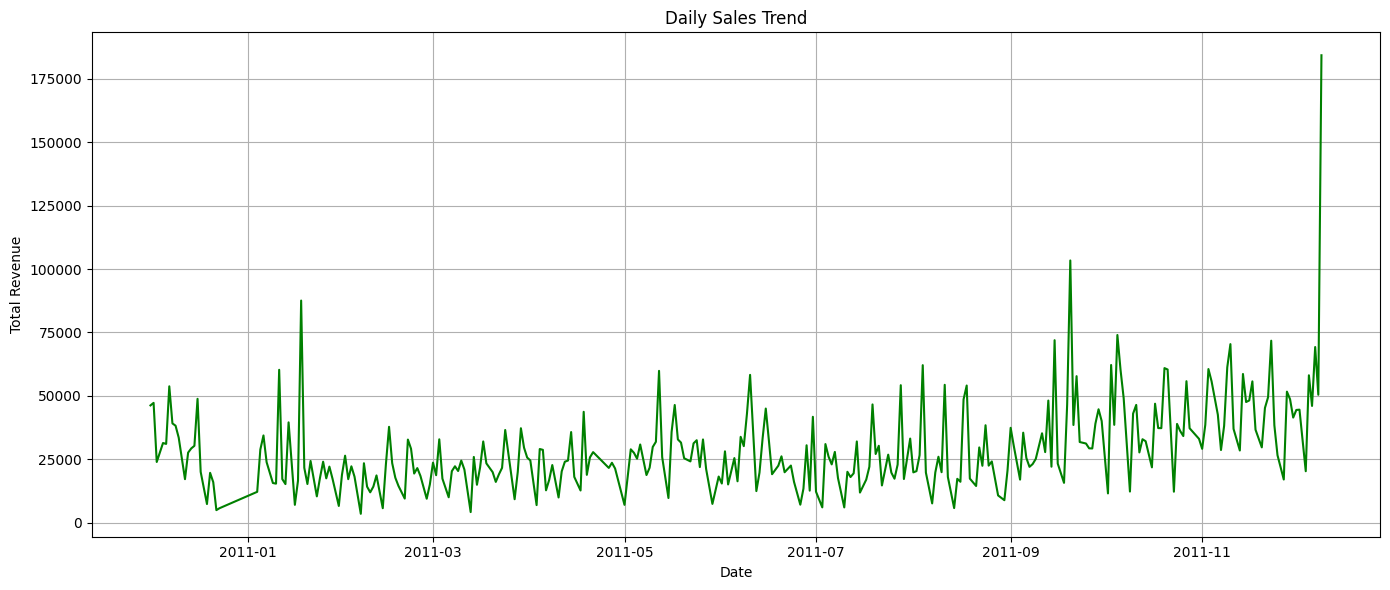

In [31]:
#Line Plot: Sales Trend Over Time (Daily Revenue)
daily_sales = df.groupby(df['InvoiceDate'].dt.date)['TotalPrice'].sum()

plt.figure(figsize=(14,6))
daily_sales.plot(kind='line', title='Daily Sales Trend', color='green')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()


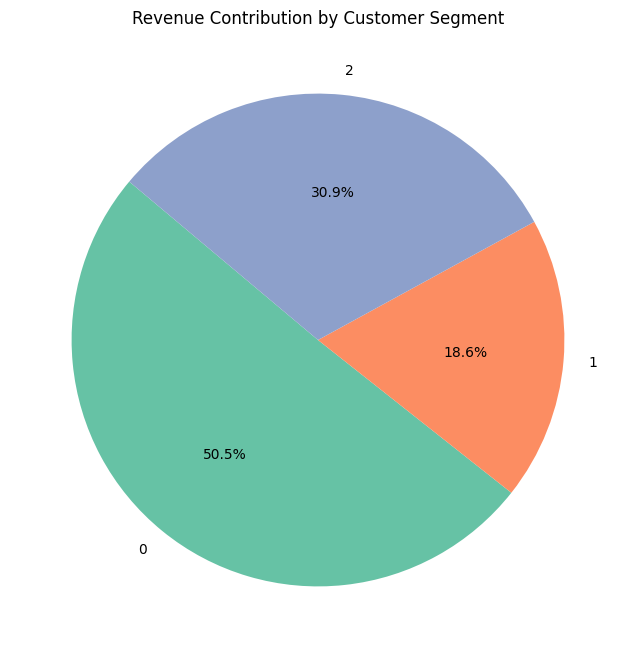

In [32]:
#Pie Chart: Percentage of Purchases by Customer Segment (Cluster)
# Total revenue by cluster
revenue_by_cluster = df_with_clusters.groupby('Cluster')['TotalPrice'].sum()

# Pie chart
plt.figure(figsize=(8,8))
revenue_by_cluster.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'))
plt.title('Revenue Contribution by Customer Segment')
plt.ylabel('')  # Remove y-label for aesthetics
plt.show()


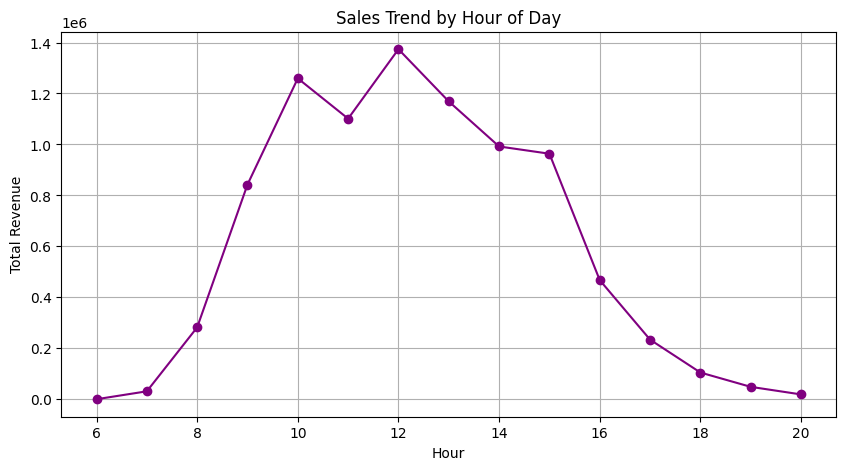

In [33]:
#Line Plot: Hourly Purchase Trend
df.groupby('Hour')['TotalPrice'].sum().plot(kind='line', marker='o', color='purple', figsize=(10,5))
plt.title('Sales Trend by Hour of Day')
plt.xlabel('Hour')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.show()


 Customer Lifetime Value (CLV)

In [35]:
#Create the RFM Table
# Reference date = latest invoice date
latest_date = df['InvoiceDate'].max()

# RFM metrics for each customer
rfm = df.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (latest_date - x.max()).days,  # Recency
    'InvoiceNo': 'nunique',                                 # Frequency
    'TotalPrice': 'sum'                                     # Monetary
})

rfm.columns = ['Recency', 'Frequency', 'Monetary']
rfm = rfm.reset_index()
rfm.head()

,CustomerID,Recency,Frequency,Monetary
0,12346.0,325,1,77183.60
1,12347.0,1,7,4310.00
2,12348.0,74,4,1797.24
3,12349.0,18,1,1757.55
4,12350.0,309,1,334.40


In [36]:
#Normalize the RFM Data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm[['Recency', 'Frequency', 'Monetary']])

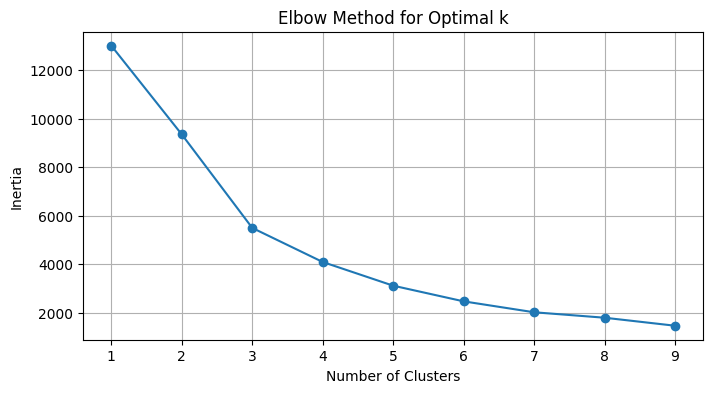

In [37]:
#Use the Elbow Method to Find the Optimal Number of Clusters (k)
from sklearn.cluster import KMeans

inertia = []
K = range(1, 10)

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(rfm_scaled)
    inertia.append(model.inertia_)

# Plot elbow curve
plt.figure(figsize=(8, 4))
plt.plot(K, inertia, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [41]:
#apply k means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)

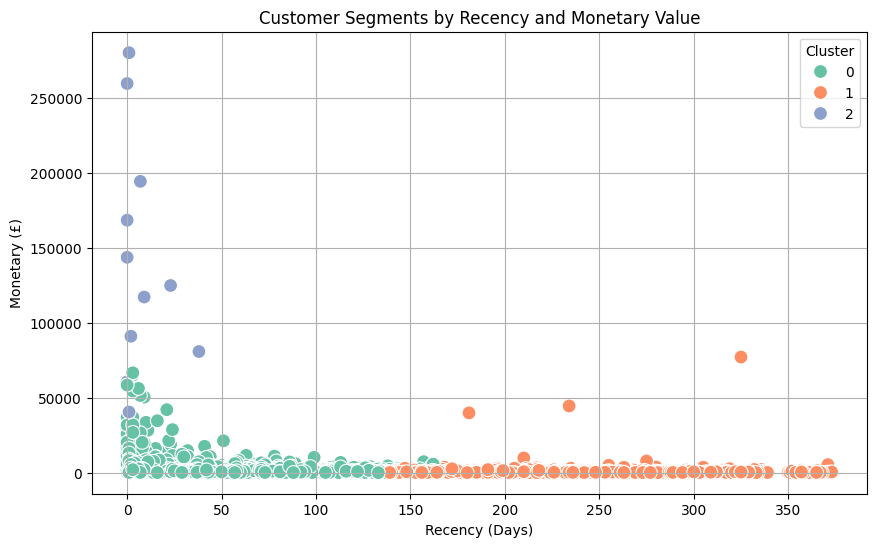

In [42]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=rfm, x='Recency', y='Monetary', hue='Cluster', palette='Set2', s=100)
plt.title('Customer Segments by Recency and Monetary Value')
plt.xlabel('Recency (Days)')
plt.ylabel('Monetary (£)')
plt.grid(True)
plt.show()


In [44]:
# Recency: lower is better, so reverse the scoring
rfm['R_Score'] = pd.qcut(rfm['Recency'], q=3, labels=[3, 2, 1]).astype(int)

# Frequency & Monetary: higher is better
rfm['F_Score'] = pd.qcut(rfm['Frequency'].rank(method='first'), q=3, labels=[1, 2, 3]).astype(int)
rfm['M_Score'] = pd.qcut(rfm['Monetary'], q=3, labels=[1, 2, 3]).astype(int)

In [45]:
rfm['RFM_Score'] = rfm['R_Score'].astype(str) + rfm['F_Score'].astype(str) + rfm['M_Score'].astype(str)


<ipython-input-46-01af56b4f01b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index[:15], palette='coolwarm')


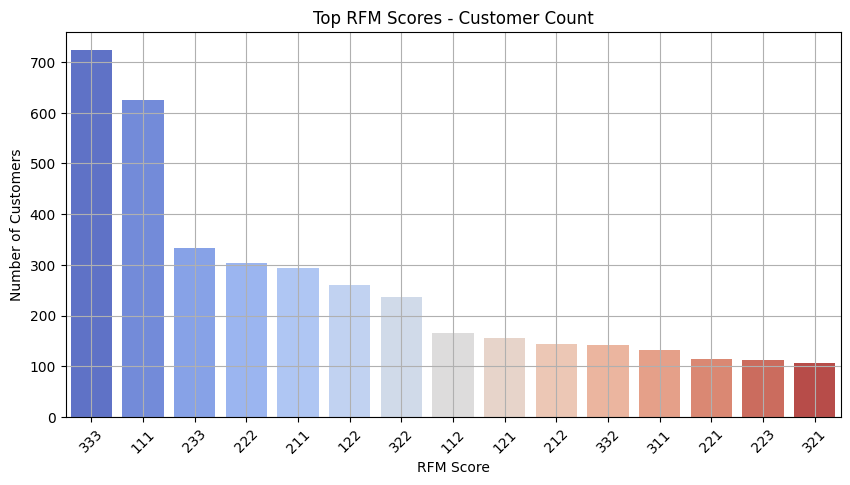

In [46]:
plt.figure(figsize=(10, 5))
sns.countplot(data=rfm, x='RFM_Score', order=rfm['RFM_Score'].value_counts().index[:15], palette='coolwarm')
plt.title('Top RFM Scores - Customer Count')
plt.xlabel('RFM Score')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [47]:
# Create target: 1 if Recency <= 60 days, else 0
rfm['Purchased_Again'] = (rfm['Recency'] <= 60).astype(int)
rfm[['Recency', 'Frequency', 'Monetary', 'Purchased_Again']].head()

,Recency,Frequency,Monetary,Purchased_Again
0,325,1,77183.60,0
1,1,7,4310.00,1
2,74,4,1797.24,0
3,18,1,1757.55,1
4,309,1,334.40,0


In [48]:
from sklearn.model_selection import train_test_split

X = rfm[['Recency', 'Frequency', 'Monetary']]
y = rfm['Purchased_Again']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [49]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Results:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       465

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



In [50]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Results:")
print(classification_report(y_test, y_pred_rf))


Random Forest Results:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       403
           1       1.00      1.00      1.00       465

    accuracy                           1.00       868
   macro avg       1.00      1.00      1.00       868
weighted avg       1.00      1.00      1.00       868



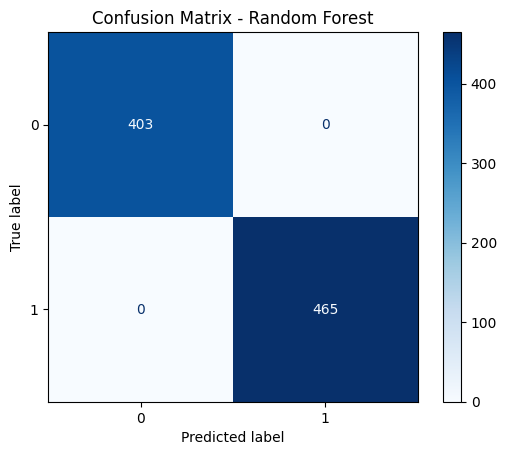

In [52]:
#Confusion matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(rf_model, X_test, y_test, cmap='Blues')
plt.title('Confusion Matrix - Random Forest')
plt.grid(False)
plt.show()



Buisness Report

In [34]:
"""
📊 1. Sales Trend by Hour of Day
Chart Insight:

Peak sales occur at 12 PM, followed closely by 10 AM and 11 AM.

There’s a sharp rise in revenue starting from 8 AM, peaking at noon.

Post-12 PM, sales gradually decline, with a noticeable drop after 3 PM.

Very low sales activity after 5 PM and before 8 AM.

Business Insight:

Focus promotions, marketing campaigns, and customer engagement during 9 AM – 1 PM, which is the most lucrative window.

Staffing and inventory planning should be optimized around this peak period.

📦 2. Top 10 Selling Products (by Quantity)
Chart Insight:

PAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR are the top-selling items.

Decorative and gift-oriented products dominate the top ranks.

Gradual decline in quantities beyond the top 3 items.

Business Insight:

Inventory for these top products should be prioritized and consistently stocked.

Consider cross-selling or bundling lower-ranked products with top-sellers.

These insights can guide decisions on product promotions and seasonal campaigns.

📅 3. Sales by Day of Week
Chart Insight:

Thursday is the highest revenue day, followed by Tuesday and Wednesday.

Weekends (Saturday and Sunday) have the lowest sales, with Sunday being the lowest.

Business Insight:

Midweek (Tue–Thu) is the most profitable. Target ads, discounts, and launches during this window.

Explore why weekends are underperforming (could be customer behavior or marketing reach).

Run weekend-exclusive deals or bundles to boost off-peak performance.

👥 4. Customer Clustering Analysis
Cluster Revenue Share:

Cluster 0: 50.5% of revenue

Cluster 2: 30.9%

Cluster 1: 18.6%

Repeat Customer Behavior:

Cluster 0: < 5 repeat customers (low loyalty, high volume)

Cluster 1: > 80 repeat customers (very loyal, low revenue)

Cluster 2: ~20 repeat customers (moderately loyal and valuable)

Business Insight:

Cluster 0 likely represents bulk buyers or one-time large purchases. Consider re-engagement or loyalty strategies to increase their repeat behavior.

Cluster 1 includes highly loyal customers but with lower spend. Upsell, cross-sell, or offer premium product recommendations to increase their cart size.

Cluster 2 represents a balanced segment — good repeat rate and revenue. Focus retention efforts and turn them into advocates or referrers.

📅 Monthly Sales Trend (as per your note)
Top months: November > December > October

Low months: February, April, January

Business Insight:

Q4 (Oct–Dec) is peak season, likely due to holidays and gift shopping. Plan major campaigns, stock-ups, and staffing here.

For low-performing months, consider seasonal promotions, loyalty rewards, or email reactivation campaigns.
"""


'\n📊 1. Sales Trend by Hour of Day\nChart Insight:\n\nPeak sales occur at 12 PM, followed closely by 10 AM and 11 AM.\n\nThere’s a sharp rise in revenue starting from 8 AM, peaking at noon.\n\nPost-12 PM, sales gradually decline, with a noticeable drop after 3 PM.\n\nVery low sales activity after 5 PM and before 8 AM.\n\nBusiness Insight:\n\nFocus promotions, marketing campaigns, and customer engagement during 9 AM – 1 PM, which is the most lucrative window.\n\nStaffing and inventory planning should be optimized around this peak period.\n\n📦 2. Top 10 Selling Products (by Quantity)\nChart Insight:\n\nPAPER CRAFT, LITTLE BIRDIE and MEDIUM CERAMIC TOP STORAGE JAR are the top-selling items.\n\nDecorative and gift-oriented products dominate the top ranks.\n\nGradual decline in quantities beyond the top 3 items.\n\nBusiness Insight:\n\nInventory for these top products should be prioritized and consistently stocked.\n\nConsider cross-selling or bundling lower-ranked products with top-sellers